In [1]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df = df.drop(columns=["Id"])

First 5 rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


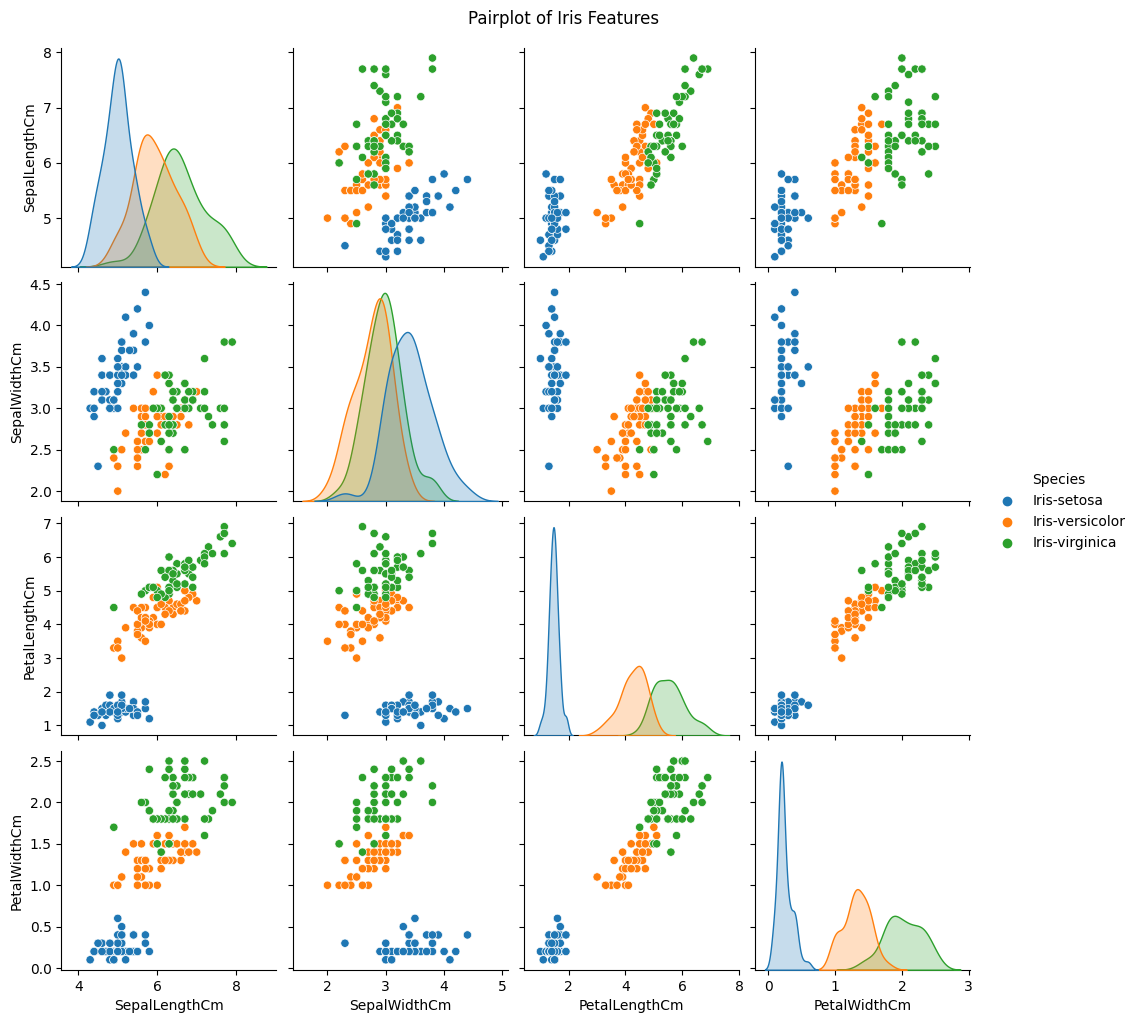

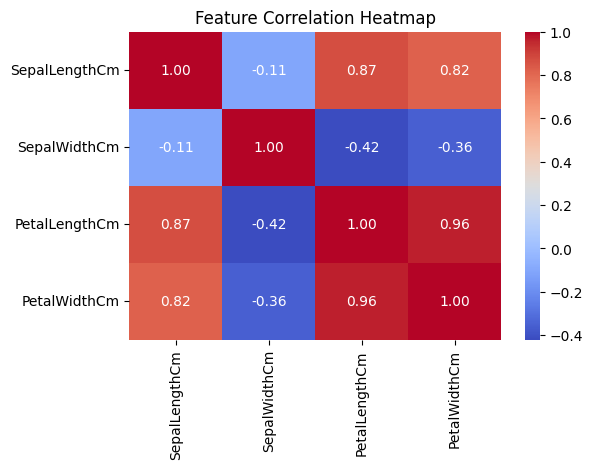

In [3]:
# Exploratory Data Analysis (EDA)
print("First 5 rows:\n", df.head())
print("\nClass distribution:\n", df['Species'].value_counts())

# Pairplot
sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
# Train-Test Split
X = df.drop(columns=["Species"])
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression Results
----------------------------------------
Cross-Validation Accuracy: 0.9733 (+/- 0.0249)
Test Accuracy: 0.9667


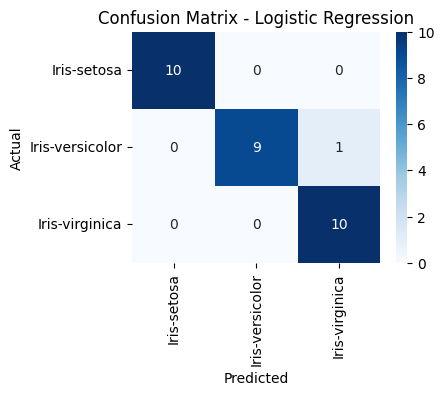

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


KNN Results
----------------------------------------
Cross-Validation Accuracy: 0.9733 (+/- 0.0249)
Test Accuracy: 1.0000


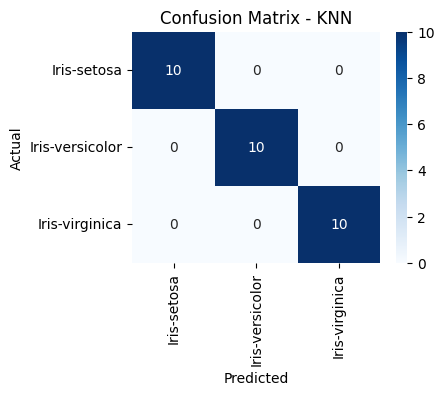

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Decision Tree Results
----------------------------------------
Cross-Validation Accuracy: 0.9533 (+/- 0.0340)
Test Accuracy: 0.9333


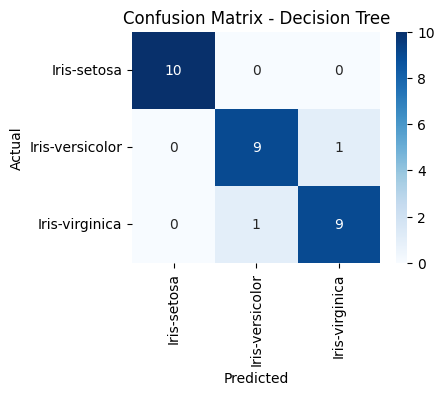

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


SVM Results
----------------------------------------
Cross-Validation Accuracy: 0.9800 (+/- 0.0163)
Test Accuracy: 1.0000


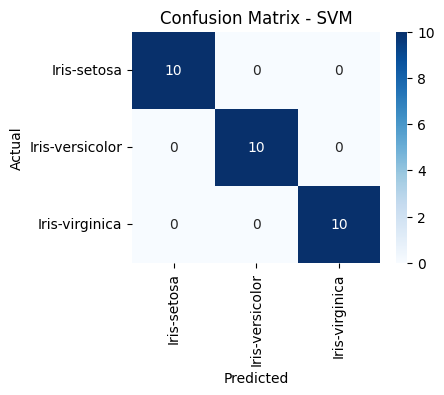

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Random Forest Results
----------------------------------------
Cross-Validation Accuracy: 0.9667 (+/- 0.0211)
Test Accuracy: 0.9000


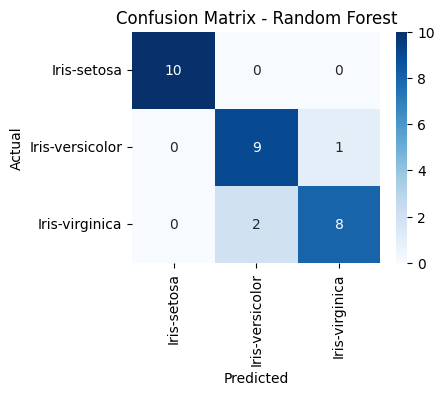

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [5]:
# Train Models with Cross-Validation
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for iris, model in models.items():
    start = time.time()
    
    # Cross-validation (5 folds)
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Train/test evaluation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        "Model": iris,
        "CV Accuracy": cv_scores.mean(),
        "Test Accuracy": acc,
        "Time (s)": round(time.time() - start, 3)
    })
    
    print(f"\n{iris} Results")
    print("-" * 40)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"Test Accuracy: {acc:.4f}")
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f"Confusion Matrix - {iris}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model Comparison:
                  Model  CV Accuracy  Test Accuracy  Time (s)
0  Logistic Regression     0.973333       0.966667     0.220
1                  KNN     0.973333       1.000000     0.042
2        Decision Tree     0.953333       0.933333     0.025
3                  SVM     0.980000       1.000000     0.029
4        Random Forest     0.966667       0.900000     0.933


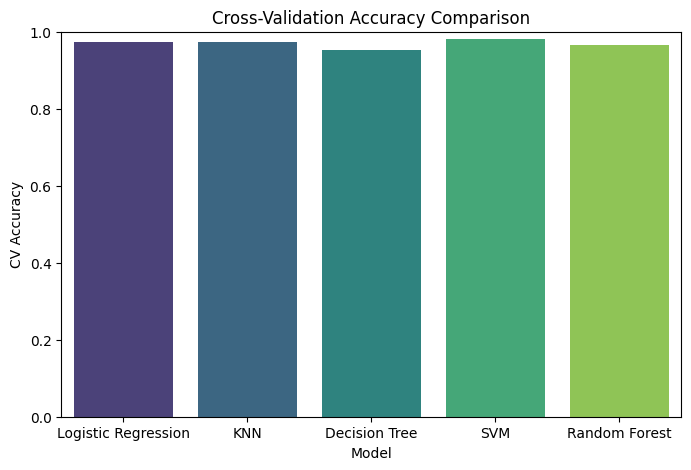

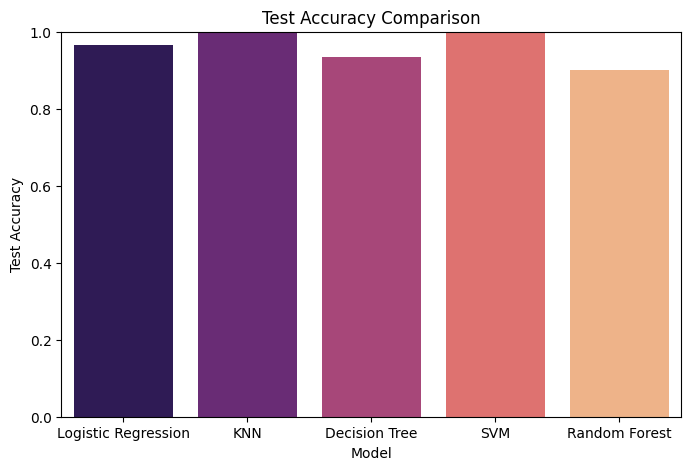

In [6]:
# Compare CV & Test Accuracies
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="CV Accuracy", data=results_df, palette="viridis")
plt.ylim(0, 1)
plt.title("Cross-Validation Accuracy Comparison")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette="magma")
plt.ylim(0, 1)
plt.title("Test Accuracy Comparison")
plt.show()

In [7]:
# Display accuracy
for iris, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{iris} Accuracy: {acc * 100:.2f}%")

Logistic Regression Accuracy: 96.67%
KNN Accuracy: 100.00%
Decision Tree Accuracy: 93.33%
SVM Accuracy: 100.00%
Random Forest Accuracy: 90.00%
